In [1]:
import pandas as pd 
import numpy as np 
import pm4py
from io import StringIO

In [ ]:
# ===== Dataset demo 100 dòng nhúng sẵn =====
data = """case:concept:name,concept:name,time:timestamp
1,Start,2025-09-01 08:00:00
1,Submit Application,2025-09-01 08:05:00
1,Check Documents,2025-09-01 08:10:00
1,Approve,2025-09-01 08:20:00
1,End,2025-09-01 08:25:00
2,Start,2025-09-01 08:02:00
2,Submit Application,2025-09-01 08:06:00
2,Check Documents,2025-09-01 08:12:00
2,Reject,2025-09-01 08:18:00
2,End,2025-09-01 08:20:00
3,Start,2025-09-01 08:04:00
3,Submit Application,2025-09-01 08:08:00
3,Check Documents,2025-09-01 08:15:00
3,Approve,2025-09-01 08:30:00
3,Archive,2025-09-01 08:35:00
3,End,2025-09-01 08:40:00
4,Start,2025-09-01 08:10:00
4,Submit Application,2025-09-01 08:13:00
4,Check Documents,2025-09-01 08:18:00
4,Approve,2025-09-01 08:25:00
4,End,2025-09-01 08:30:00
5,Start,2025-09-01 08:20:00
5,Submit Application,2025-09-01 08:25:00
5,Check Documents,2025-09-01 08:35:00
5,Reject,2025-09-01 08:40:00
5,End,2025-09-01 08:42:00
6,Start,2025-09-01 08:25:00
6,Submit Application,2025-09-01 08:28:00
6,Check Documents,2025-09-01 08:34:00
6,Approve,2025-09-01 08:38:00
6,End,2025-09-01 08:45:00
7,Start,2025-09-01 08:30:00
7,Submit Application,2025-09-01 08:35:00
7,Check Documents,2025-09-01 08:40:00
7,Approve,2025-09-01 08:50:00
7,Archive,2025-09-01 08:55:00
7,End,2025-09-01 09:00:00
8,Start,2025-09-01 08:45:00
8,Submit Application,2025-09-01 08:50:00
8,Check Documents,2025-09-01 08:55:00
8,Reject,2025-09-01 09:00:00
8,End,2025-09-01 09:02:00
9,Start,2025-09-01 08:50:00
9,Submit Application,2025-09-01 08:55:00
9,Check Documents,2025-09-01 09:00:00
9,Approve,2025-09-01 09:10:00
9,End,2025-09-01 09:15:00
10,Start,2025-09-01 09:00:00
10,Submit Application,2025-09-01 09:05:00
10,Check Documents,2025-09-01 09:10:00
10,Approve,2025-09-01 09:15:00
10,Archive,2025-09-01 09:20:00
10,End,2025-09-01 09:25:00
11,Start,2025-09-01 09:10:00
11,Submit Application,2025-09-01 09:12:00
11,Check Documents,2025-09-01 09:18:00
11,Reject,2025-09-01 09:25:00
11,End,2025-09-01 09:27:00
12,Start,2025-09-01 09:20:00
12,Submit Application,2025-09-01 09:22:00
12,Check Documents,2025-09-01 09:30:00
12,Approve,2025-09-01 09:40:00
12,End,2025-09-01 09:45:00
13,Start,2025-09-01 09:25:00
13,Submit Application,2025-09-01 09:28:00
13,Check Documents,2025-09-01 09:35:00
13,Approve,2025-09-01 09:42:00
13,Archive,2025-09-01 09:50:00
13,End,2025-09-01 09:55:00
14,Start,2025-09-01 09:30:00
14,Submit Application,2025-09-01 09:33:00
14,Check Documents,2025-09-01 09:40:00
14,Reject,2025-09-01 09:45:00
14,End,2025-09-01 09:48:00
15,Start,2025-09-01 09:35:00
15,Submit Application,2025-09-01 09:38:00
15,Check Documents,2025-09-01 09:45:00
15,Approve,2025-09-01 09:50:00
15,End,2025-09-01 09:55:00
"""

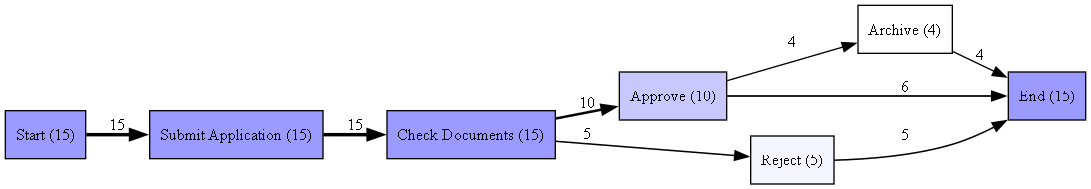

In [27]:
import pandas as pd
from io import StringIO
import pm4py
from pm4py.algo.discovery.dfg import algorithm as dfg_algo
from pm4py.visualization.dfg import visualizer as dfg_vis

# Giả sử 'data' là chuỗi CSV
df = pd.read_csv(StringIO(data))

# Chuẩn hóa event log
event_log = pm4py.format_dataframe(
    df,
    case_id='case:concept:name',
    activity_key='concept:name',
    timestamp_key='time:timestamp'
)

# Discover DFG (frequency)
dfg_freq = dfg_algo.apply(event_log, variant=dfg_algo.Variants.FREQUENCY)

# Tạo visualization object
gviz_freq = dfg_vis.apply(dfg_freq, log=event_log, variant=dfg_vis.Variants.FREQUENCY)

# Hiển thị DFG
dfg_vis.view(gviz_freq)


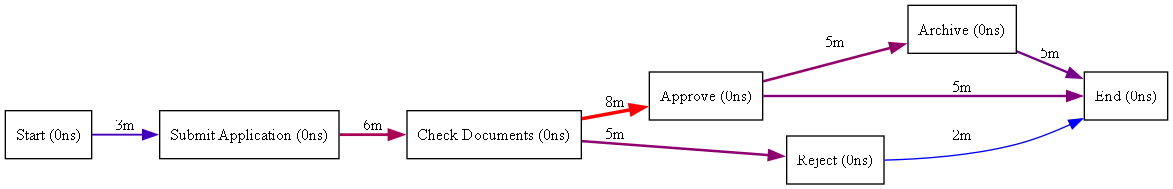

In [29]:
# Discover DFG (performance)
dfg_perf = dfg_algo.apply(event_log, variant=dfg_algo.Variants.PERFORMANCE)

# Tạo visualization object
gviz_perf = dfg_vis.apply(dfg_perf, log=event_log, variant=dfg_vis.Variants.PERFORMANCE)

# Hiển thị DFG
dfg_vis.view(gviz_perf)

In [30]:
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)

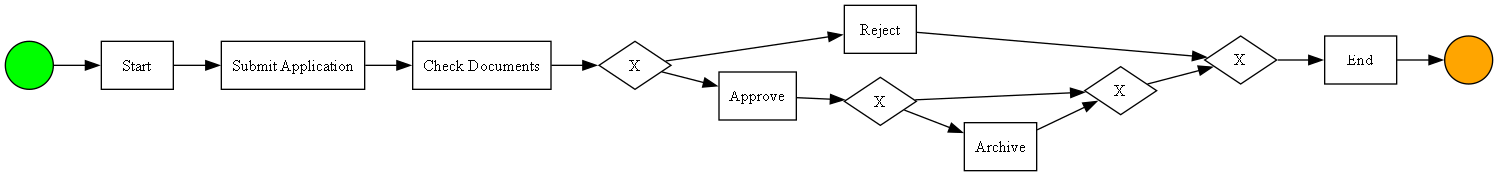

In [7]:
pm4py.view_bpmn(bpmn_graph)

In [34]:
bpmn_nodes = []
for node in bpmn_graph.get_nodes():
    node_type = type(node).__name__  # Gateway, Activity, StartEvent...
    node_id = getattr(node, "id", None)
    node_name = getattr(node, "name", None)
    bpmn_nodes.append({"id": node_id, "name": node_name, "type": node_type})

bpmn_edges = []
for edge in bpmn_graph.get_flows():
    source_id = getattr(edge.source, "id", None)
    target_id = getattr(edge.target, "id", None)
    bpmn_edges.append((source_id, target_id))


# Hướng dẫn: 
- Lấy BPMN làm ROOT MAP. Lấy thống kê tần suất và performance của các cạnh từ dfg_freq và dfg_perf. Thêm vào ROOT MAP. Xuất ra file ảnh hoặc nếu được thì có thể tương tác với node, edge.

## Đây là BPMN chuẩn - ROOT MAP

In [35]:
bpmn_nodes

[{'id': 'ide915afb3-36a5-4552-bf7c-6d6c1413ba86',
  'name': 'start',
  'type': 'StartEvent'},
 {'id': 'id927f48a7-4a4d-4fc5-b39b-bf329d468bcf',
  'name': 'End',
  'type': 'Task'},
 {'id': 'idcb7d21ee-86b1-4fed-b460-092e346d3e76',
  'name': 'Start',
  'type': 'Task'},
 {'id': 'id8a117aac-641c-44b8-b275-1698ac4796a2',
  'name': 'Reject',
  'type': 'Task'},
 {'id': 'idf8ea1333-38a0-4b90-8a93-31158955906f',
  'name': 'Archive',
  'type': 'Task'},
 {'id': 'idfeb23139-4055-496d-ba3e-a9b16236fb85',
  'name': 'Submit Application',
  'type': 'Task'},
 {'id': 'id5b4c7547-de07-488b-b43b-79a59e404102',
  'name': 'Approve',
  'type': 'Task'},
 {'id': 'iddfd74a1f-f711-4e89-8ad4-8d8dada9447e',
  'name': '',
  'type': 'ExclusiveGateway'},
 {'id': 'ida27a8d53-e89c-49d5-a5d7-e76b2c04560c',
  'name': '',
  'type': 'ExclusiveGateway'},
 {'id': 'id007a84d1-94e1-45f0-b104-49d6a683214b',
  'name': 'end',
  'type': 'NormalEndEvent'},
 {'id': 'id1a4260ee-519c-43b0-8fc7-22a1a8fa8a57',
  'name': '',
  'type': 'E

In [36]:
bpmn_edges

[('idfeb23139-4055-496d-ba3e-a9b16236fb85',
  'id96fa0998-beb2-49e1-a3a8-fc11ec4e4ade'),
 ('id96fa0998-beb2-49e1-a3a8-fc11ec4e4ade',
  'id1a4260ee-519c-43b0-8fc7-22a1a8fa8a57'),
 ('idf8ea1333-38a0-4b90-8a93-31158955906f',
  'id3386a601-aa2d-42f0-8f03-7f81fb1ef1ae'),
 ('id927f48a7-4a4d-4fc5-b39b-bf329d468bcf',
  'id007a84d1-94e1-45f0-b104-49d6a683214b'),
 ('id1a4260ee-519c-43b0-8fc7-22a1a8fa8a57',
  'id5b4c7547-de07-488b-b43b-79a59e404102'),
 ('id5b4c7547-de07-488b-b43b-79a59e404102',
  'ida27a8d53-e89c-49d5-a5d7-e76b2c04560c'),
 ('ida27a8d53-e89c-49d5-a5d7-e76b2c04560c',
  'idf8ea1333-38a0-4b90-8a93-31158955906f'),
 ('iddfd74a1f-f711-4e89-8ad4-8d8dada9447e',
  'id927f48a7-4a4d-4fc5-b39b-bf329d468bcf'),
 ('id1a4260ee-519c-43b0-8fc7-22a1a8fa8a57',
  'id8a117aac-641c-44b8-b275-1698ac4796a2'),
 ('ida27a8d53-e89c-49d5-a5d7-e76b2c04560c',
  'id3386a601-aa2d-42f0-8f03-7f81fb1ef1ae'),
 ('id3386a601-aa2d-42f0-8f03-7f81fb1ef1ae',
  'iddfd74a1f-f711-4e89-8ad4-8d8dada9447e'),
 ('idcb7d21ee-86b1-4f

## Đây là thống kế performance của các cạnh.

In [31]:
dfg_perf

{('Approve', 'Archive'): 345.0,
 ('Approve', 'End'): 320.0,
 ('Archive', 'End'): 300.0,
 ('Check Documents', 'Approve'): 498.0,
 ('Check Documents', 'Reject'): 336.0,
 ('Reject', 'End'): 132.0,
 ('Start', 'Submit Application'): 228.0,
 ('Submit Application', 'Check Documents'): 376.0}

## Đây là thống kê tần suất của các cạnh.

In [32]:
dfg_freq

{('Approve', 'Archive'): 4,
 ('Approve', 'End'): 6,
 ('Archive', 'End'): 4,
 ('Check Documents', 'Approve'): 10,
 ('Check Documents', 'Reject'): 5,
 ('Reject', 'End'): 5,
 ('Start', 'Submit Application'): 15,
 ('Submit Application', 'Check Documents'): 15}